## Experiment:4 Gradient Boosting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('samplesub.csv')


In [10]:
print(df.columns)


Index(['id', 'target'], dtype='object')


In [11]:
print(df.head())


       id  target
0  900000     0.5
1  900001     0.5
2  900002     0.5
3  900003     0.5
4  900004     0.5


In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


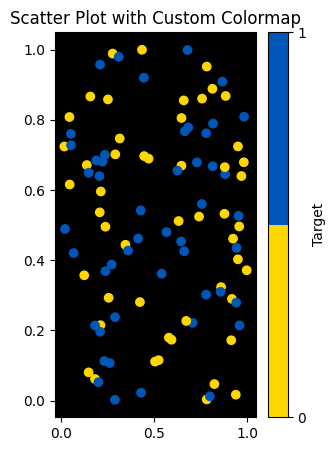

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set figure size
plt.figure(figsize=(11, 5))

# Define a colormap
cmap = ListedColormap(["#ffd700", "#0057b8"])  # yellow for 0, blue for 1

# Example subplot creation
ax = plt.subplot(1, 3, 1)

# Sample data and plotting
import numpy as np
x, y = np.random.rand(100), np.random.rand(100)
targets = np.random.randint(0, 2, 100)
scatter = ax.scatter(x, y, c=targets, cmap=cmap)
ax.set_title('Scatter Plot with Custom Colormap')

# Optional: Add a colorbar to show the colormap
plt.colorbar(scatter, ax=ax, ticks=[0, 1], label='Target')

# Save the figure
plt.savefig('three-projections.png')

# Show the figure
plt.show()


In [17]:
import pandas as pd

# Load data from CSV files (replace 'train.csv' and 'test.csv' with your actual file paths)
train = pd.read_csv('tr1.csv')
test = pd.read_csv('te1.csv')


In [18]:
print(train.head())
print(test.head())


   id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       

In [19]:
for df in [train, test]:
    # Extract the 10 letters of f_27 into individual features
    for i in range(10):
        df[f'ch{i}'] = df['f_27'].str.get(i).apply(ord) - ord('A')


In [22]:
import pandas as pd

# Load data from CSV files
train = pd.read_csv('tr1.csv')
test = pd.read_csv('te1.csv')

# Process the data to extract features
for df in [train, test]:
    # Ensure 'f_27' column exists and contains string data
    if 'f_27' in df.columns:
        for i in range(10):
            df[f'ch{i}'] = df['f_27'].str.get(i).apply(ord) - ord('A')
    else:
        print("Column 'f_27' is not present in DataFrame")

# Verify the changes
print(train.head())
print(test.head())


   id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...  ch0  ch1  ch2  ch3  ch4  ch5  ch6  ch7  ch8  ch9  
0     1     5  ...    0    1    0    1    3    0    3    1    0    1  
1     1     3  ...    0    2    0    2    2    0    3    2    4    1  
2     1     0  ...    0    0    0    4    0    1    2   10    0    3  
3     3     2  ...    1    3    1    1    0    0    2    1    2    1  
4     3     3  ...    1    3    1    2    1    1    2    7    5    4  

[5 rows x 43 columns]
       id      f_00      f_01      f_02      f_03      f_04      f_05  \
0  

In [23]:
for df in [train, test]:
    # Extract the 10 letters of f_27 into individual features
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
        
    # unique_characters feature is from https://www.kaggle.com/code/cabaxiom/tps-may-22-eda-lgbm-model
    df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
    
    # Feature interactions: create three ternary features
    # Every ternary feature can have the values -1, 0 and +1
    df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
    df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)
    
features = [f for f in test.columns if f != 'id' and f != 'f_27']
test[features].head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters,i_02_21,i_05_22,i_00_01_26
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,1,0,3,11,0,2,5,0,0,1
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1,0,4,6,2,1,6,0,0,0


In [30]:
from sklearn.model_selection import *
from lightgbm import LGBMClassifier


In [33]:
import lightgbm as lgb
print(lgb.__version__)


4.5.0


In [37]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
import time

# Define the booster function
def my_booster(random_state=1, n_estimators=10000):
    return LGBMClassifier(
        n_estimators=n_estimators,
        min_child_samples=80,
        num_leaves=127,
        subsample=0.85,
        subsample_freq=1,
        max_bins=511,
        random_state=random_state
    )

# Assuming 'train' and 'features' are defined
print(f"{len(features)} features")

score_list = []
kf = KFold(n_splits=5)

# Timing the cross-validation process
start_time = time.time()

for fold, (idx_tr, idx_va) in enumerate(kf.split(train)):
    X_tr = train.iloc[idx_tr][features]
    X_va = train.iloc[idx_va][features]
    y_tr = train.iloc[idx_tr].target
    y_va = train.iloc[idx_va].target
    
    model = my_booster()
    best_score = -np.inf
    best_iter = 0
    n_iter_no_change = 0

    for i in range(1, 10001):
        model.n_estimators = i
        model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)])
        y_va_pred = model.predict_proba(X_va)[:, 1]
        score = roc_auc_score(y_va, y_va_pred)
        
        if score > best_score:
            best_score = score
            best_iter = i
            n_iter_no_change = 0
        else:
            n_iter_no_change += 1
        
        if n_iter_no_change >= 100:  # Stop early if no improvement for 100 iterations
            break
    
    print(f"Fold {fold}: AUC = {best_score:.5f}")
    score_list.append(best_score)
    
    # Break after the first fold if only one fold is needed
    break

end_time = time.time()
print(f"OOF AUC: {np.mean(score_list):.5f}")
print(f"Time taken: {end_time - start_time:.2f} seconds")


44 features
[LightGBM] [Info] Number of positive: 350387, number of negative: 369613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8466
[LightGBM] [Info] Number of data points in the train set: 720000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486649 -> initscore=-0.053418
[LightGBM] [Info] Start training from score -0.053418
[LightGBM] [Info] Number of positive: 350387, number of negative: 369613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.281463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8466
[LightGBM] [Info] Number of data points in the train set: 720000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486649 -> init

KeyboardInterrupt: 

In [38]:
def my_booster(random_state=1, n_estimators=10000):
    return LGBMClassifier(
        n_estimators=n_estimators,
        min_child_samples=80,
        num_leaves=127,
        subsample=0.85,
        subsample_freq=1,
        max_bins=511,
        random_state=random_state,
        verbose=1000  # Set verbosity level in constructor
    )


In [39]:
from lightgbm import early_stopping

callbacks = [early_stopping(stopping_rounds=100)]
model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], callbacks=callbacks)


[LightGBM] [Info] Number of positive: 350387, number of negative: 369613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.288207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8466
[LightGBM] [Info] Number of data points in the train set: 720000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486649 -> initscore=-0.053418
[LightGBM] [Info] Start training from score -0.053418
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[40]	valid_0's binary_logloss: 0.25595


LGBMClassifier(max_bins=511, min_child_samples=80, n_estimators=40,
               num_leaves=127, random_state=1, subsample=0.85,
               subsample_freq=1)

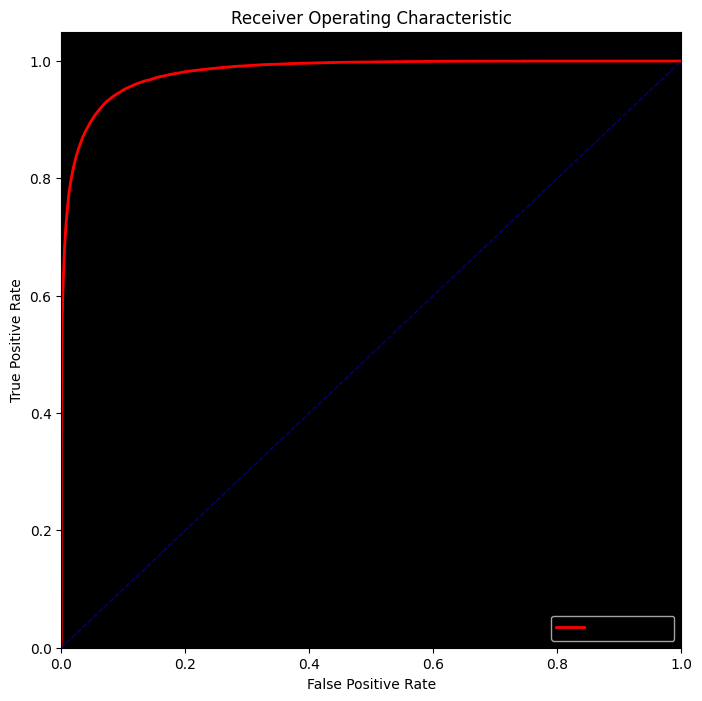

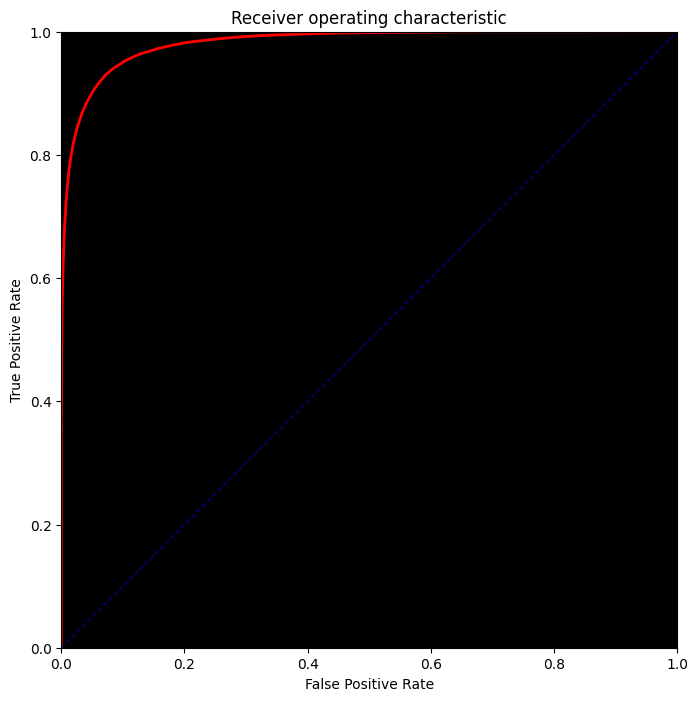

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_va, y_va_pred):
    plt.figure(figsize=(8, 8))
    fpr, tpr, _ = roc_curve(y_va, y_va_pred)
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Assuming y_va and y_va_pred are defined
plot_roc_curve(y_va, y_va_pred)

# Plot the roc curve for the last fold
def plot_roc_curve(y_va, y_va_pred):
    plt.figure(figsize=(8, 8))
    fpr, tpr, _ = roc_curve(y_va, y_va_pred)
    plt.plot(fpr, tpr, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
    plt.gca().set_aspect('equal')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.show()

plot_roc_curve(y_va, y_va_pred)

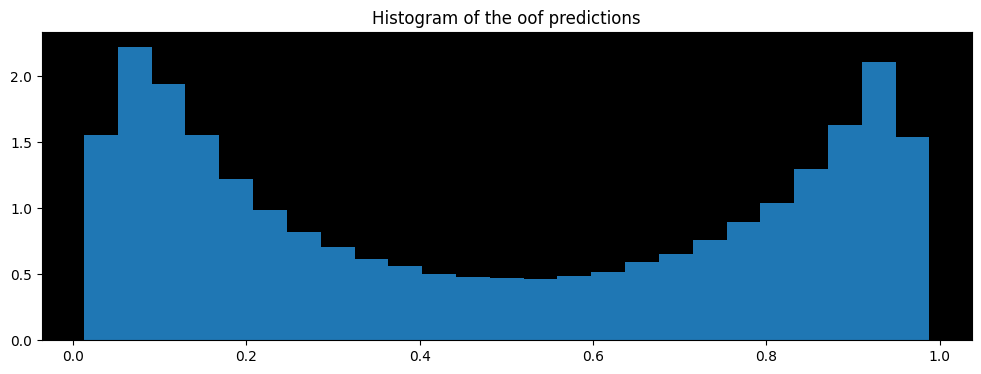

In [42]:
plt.figure(figsize=(12, 4))
plt.hist(y_va_pred, bins=25, density=True)
plt.title('Histogram of the oof predictions')
plt.show()

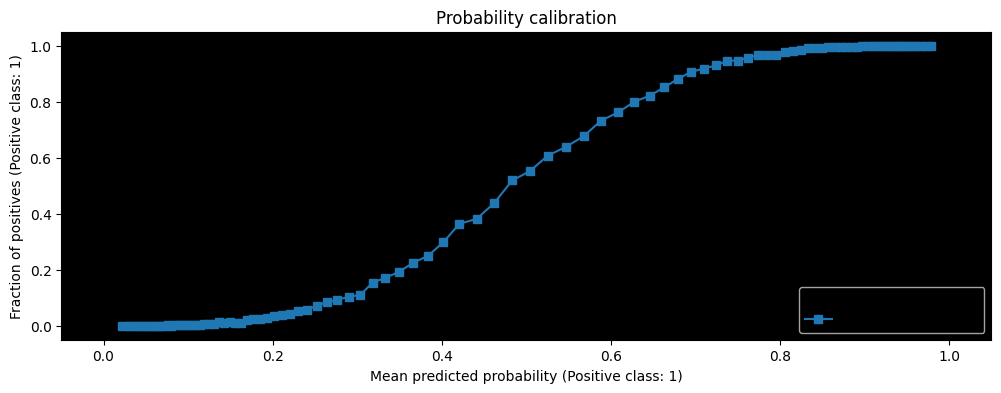

In [44]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
plt.figure(figsize=(12, 4))
CalibrationDisplay.from_predictions(y_va, y_va_pred, n_bins=100, strategy='quantile', ax=plt.gca())
plt.title('Probability calibration')
plt.show()